In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
class AZmet:
    def __init__ (self, filename):
        file = pd.read_csv(filename, names = ["Year", "Day", "Hour", 
                                            "Air Temperature", "Relative Humidity", 
                                            "VPD", "Solar Radiation", "Precipitation", 
                                            "4 inch Soil T", "12 inch Soil T", 
                                            "Avg Wind Speed", "Wind Vector Magnitude", 
                                            "Wind Vector Direction", "Wind Direction STDEV", 
                                            "Max Wind Speed", "Reference Evapotranspiration", 
                                            "Actual Vapor Pressure", "Dewpoint"])
        file_df = pd.DataFrame(file)
        file_df['combined'] = file_df["Year"]*1000 + file_df["Day"]
        file_df["date"] = pd.to_datetime(file_df["combined"], format = "%Y%j")
        data = file_df.set_index('date')
        del data['combined']
        self.__data__ = data
        
    def specific_time(self, date1, date2):
        data = self.__data__
        data = data[['Year', 'Day', 'Air Temperature', '4 inch Soil T']]
        specific_time_start = data[data.index >= date1]
        specific_time_end = specific_time_start[specific_time_start.index <= date2]
        return specific_time_end
    
filename = AZmet('/Users/sebastiancalleja/Desktop/AZmet Data/2015_azmet_data.txt')

In [3]:
azmet_2015 = AZmet.specific_time(filename, '2015-03-01', '2015-05-31')
azmet_2015.reset_index()
data_mean_2015 = azmet_2015.groupby(["date"], axis = 0, as_index = True).mean()

In [4]:
data_2020 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2020.csv')
data_2019 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2019.csv')
data_2018 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2018.csv')
data_2017 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2017.csv')
data_2016 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2016.csv')
data_2015 = pd.read_csv('/Users/sebastiancalleja/Desktop/AZmet Data/Daily Averages (Mar-May)/AZmet_Daily_Average_2015.csv')

In [5]:
data_2020

,date,Year,Day,Air Temperature,4 inch Soil T
0,2020-03-01,2020,61,16.033333,16.170833
1,2020-03-02,2020,62,12.720833,15.175000
2,2020-03-03,2020,63,15.212500,15.933333
3,2020-03-04,2020,64,14.250000,16.558333
4,2020-03-05,2020,65,15.875000,16.804167
...,...,...,...,...,...
87,2020-05-27,2020,148,31.608333,30.400000
88,2020-05-28,2020,149,34.012500,30.462500
89,2020-05-29,2020,150,34.516667,26.912500
90,2020-05-30,2020,151,33.308333,27.429167


In [6]:
def c_to_f (data, air, soil):
    data['Air Temperature F'] = pd.DataFrame((air*(9/5)) + 32)
    data['4 inch Soil T F'] = pd.DataFrame((soil*(9/5)) + 32)
    return data

In [7]:
data_2020_f = c_to_f(data_2020, data_2020['Air Temperature'], data_2020['4 inch Soil T'])
data_2019_f = c_to_f(data_2019, data_2019['Air Temperature'], data_2019['4 inch Soil T'])
data_2018_f = c_to_f(data_2018, data_2018['Air Temperature'], data_2018['4 inch Soil T'])
data_2017_f = c_to_f(data_2017, data_2017['Air Temperature'], data_2017['4 inch Soil T'])
data_2016_f = c_to_f(data_2016, data_2016['Air Temperature'], data_2016['4 inch Soil T'])
data_2015_f = c_to_f(data_2015, data_2015['Air Temperature'], data_2015['4 inch Soil T'])

In [8]:
avg_air_temp_2020 = data_2020_f['Air Temperature F']
avg_air_temp_2019 = data_2019_f['Air Temperature F']
avg_air_temp_2018 = data_2018_f['Air Temperature F']
avg_air_temp_2017 = data_2017_f['Air Temperature F']
avg_air_temp_2016 = data_2016_f['Air Temperature F']
avg_air_temp_2015 = data_2015_f['Air Temperature F']
avg_soil_temp_2020 = data_2020_f['4 inch Soil T F']
avg_soil_temp_2019 = data_2019_f['4 inch Soil T F']
avg_soil_temp_2018 = data_2018_f['4 inch Soil T F']
avg_soil_temp_2017 = data_2017_f['4 inch Soil T F']
avg_soil_temp_2016 = data_2016_f['4 inch Soil T F']
avg_soil_temp_2015 = data_2015_f['4 inch Soil T F']
date = pd.to_datetime(data_2020_f['date'])

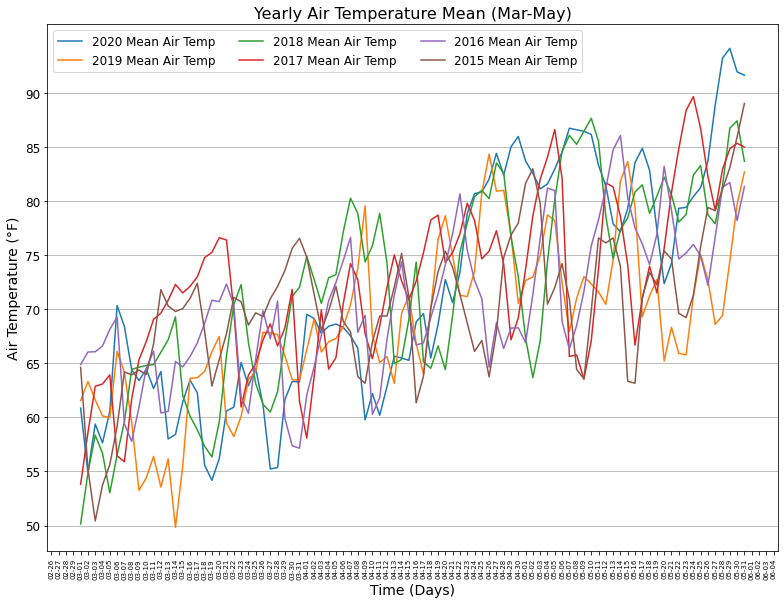

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
ax.plot(date, avg_air_temp_2020, label = '2020 Mean Air Temp')
ax.plot(date, avg_air_temp_2019, label = '2019 Mean Air Temp')
ax.plot(date, avg_air_temp_2018, label = '2018 Mean Air Temp')
ax.plot(date, avg_air_temp_2017, label = '2017 Mean Air Temp')
ax.plot(date, avg_air_temp_2016, label = '2016 Mean Air Temp')
ax.plot(date, avg_air_temp_2015, label = '2015 Mean Air Temp')


ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=90)
plt.yticks(np.arange(50, max(avg_air_temp_2020), 5))
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("Air Temperature (°F)", fontsize=14)
plt.title("Yearly Air Temperature Mean (Mar-May)", fontsize=16)
ax.legend(loc = 'best', ncol= 3, fontsize=12)
ax.yaxis.grid()
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=7)
fig.set_size_inches(11.0,8.5)
plt.tight_layout()
plt.savefig("Yearly Air Temperature Mean (Mar-May).pdf", dpi = 300)

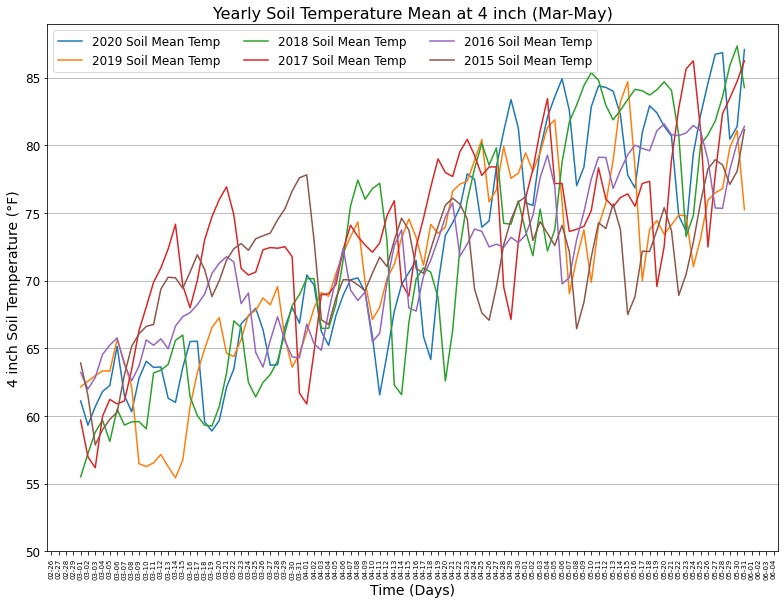

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)  
ax.plot(date, avg_soil_temp_2020, label = '2020 Soil Mean Temp')
ax.plot(date, avg_soil_temp_2019, label = '2019 Soil Mean Temp')
ax.plot(date, avg_soil_temp_2018, label = '2018 Soil Mean Temp')
ax.plot(date, avg_soil_temp_2017, label = '2017 Soil Mean Temp')
ax.plot(date, avg_soil_temp_2016, label = '2016 Soil Mean Temp')
ax.plot(date, avg_soil_temp_2015, label = '2015 Soil Mean Temp')


ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.xticks(rotation=90)
plt.yticks(np.arange(50, max(avg_soil_temp_2020), 5))
plt.xlabel("Time (Days)", fontsize=14)
plt.ylabel("4 inch Soil Temperature (°F)", fontsize=14)
plt.title("Yearly Soil Temperature Mean at 4 inch (Mar-May)", fontsize=16)
ax.legend(loc = 'best', ncol= 3, fontsize=12)
ax.yaxis.grid()
plt.tick_params(axis='y', which='major', labelsize=12)
plt.tick_params(axis='x', which='major', labelsize=7)
fig.set_size_inches(11.0,8.5)
plt.tight_layout()
plt.savefig("Yearly Soil Temperature Mean at 4 inch (Mar-May).pdf", dpi = 1000)